In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
# Load an image
img_gray = cv2.imread('messi5.jpg', cv2.IMREAD_GRAYSCALE)  # cv2.IMREAD_GRAYSCALE: 0
img_color = cv2.imread('messi5.jpg', cv2.IMREAD_COLOR)  # cv2.IMREAD_COLOR: 1
if img_color is None:
    raise SystemExit(0)
# cv2.imread does not throw exception with wrong path, but returns None
print(img_color.shape)
print(img_color.size)  # same as production of shape
print(img_color.dtype)

(342, 548, 3)
562248
uint8


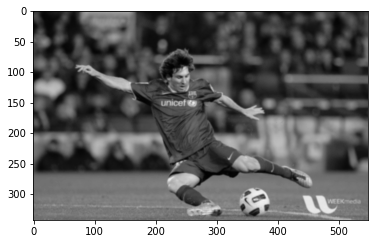

In [5]:
# Viewing image via matplotlib
plt.imshow(img_gray, cmap='gray', interpolation='bicubic')
plt.show()

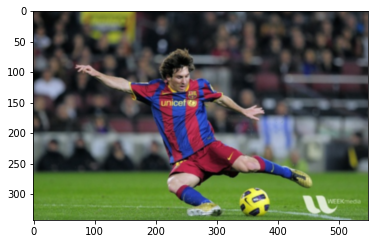

In [6]:
# cv2 image is B G R order but matplotlib is R G B order,
# so change the order when reading via matplotlib
plt.imshow(img_color[:, :, ::-1], interpolation='bicubic')
plt.show()

In [7]:
# Write image
cv2.imwrite('messi_gray.png', img_gray)

True

In [8]:
!ls

20210518.ipynb	messi5.jpg  messi_gray.png


In [9]:
# Access a pixel value
print('[B G R]:', img_color[100, 100])
print('blue:', img_color.item(100, 100, 0))
# .item(100, 100, 0) method of numpy provides better speed

[B G R]: [157 166 200]
blue: 157


In [10]:
red_pixels = img_color[:, :, 2]
red_pixels

array([[ 44,  47,  52, ...,  55,  53,  50],
       [ 44,  49,  54, ...,  60,  58,  55],
       [ 50,  55,  60, ...,  65,  64,  61],
       ...,
       [ 99,  89,  86, ...,  92,  94, 103],
       [ 96,  99,  87, ...,  91, 104,  97],
       [ 87,  98, 108, ...,  86,  87,  86]], dtype=uint8)

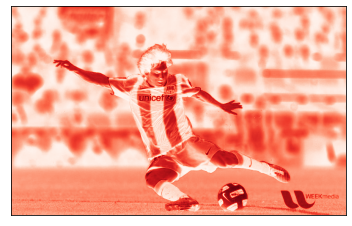

In [11]:
plt.imshow(red_pixels, cmap='Reds')
plt.xticks([]), plt.yticks([])
plt.show()

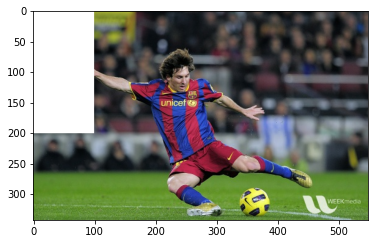

In [12]:
# Modify the pixel
img_modify = img_color.copy()  # .copy() prevents mutating original data
img_modify[0:200, 0:100] = [255, 255, 255]
plt.imshow(img_modify[:, :, ::-1])
# .itemset() method of numpy provides better speed

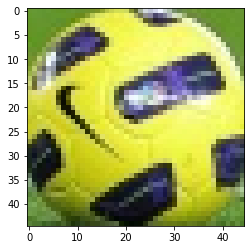

In [13]:
ball = img_color[290:335, 340:385]
plt.imshow(ball[:, :, ::-1])

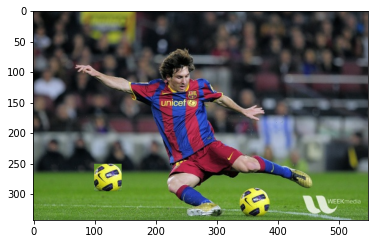

In [14]:
img_ball_change = img_color.copy()
img_ball_change[250:295, 100:145] = ball
plt.imshow(img_ball_change[:, :, ::-1])

In [15]:
x = np.uint8([250])
y = np.uint8([10])
cv2.add(x, y)

# img1 = cv2.imread()
# img2 = cv2.imread()
# weight = 0.5
# dst = cv2.addWeighted(img1, weight, img2, 1 - weight, 0)

array([[255]], dtype=uint8)

In [16]:
# ConvertColor
cv2.cvtColor
print([i for i in dir(cv2) if i.startswith('COLOR_')])  # Conversion Codes

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

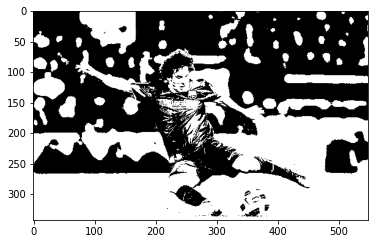

In [17]:
# Threshold
ret, thresh1 = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')

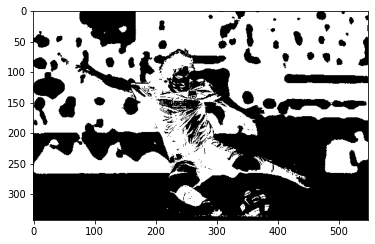

In [18]:
ret, thresh2 = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh2, cmap='gray')

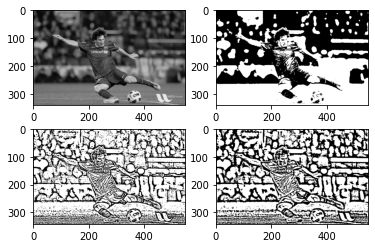

In [19]:
thresh3 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
thresh4 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

for i, _img in enumerate([img_gray, thresh1, thresh3, thresh4]):
    plt.subplot(2, 2, i+1), plt.imshow(_img, cmap='gray')
plt.show()

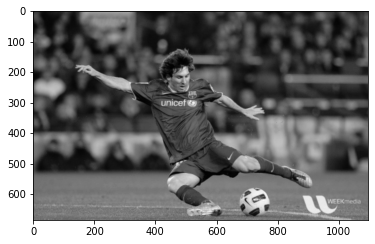

In [20]:
# Resize
res = cv2.resize(img_gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
plt.imshow(res, cmap='gray')

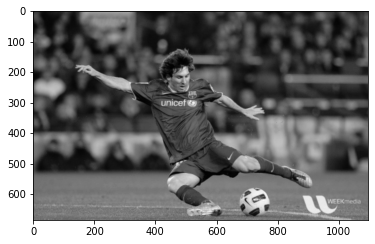

In [21]:
height, width, *_ = img_gray.shape
res = cv2.resize(img_gray, (2 * width, 2 * height), interpolation=cv2.INTER_LINEAR)
plt.imshow(res, cmap='gray')

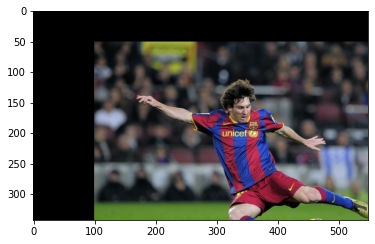

In [22]:
# Translation - Shift
rows, cols, *_ = img_color.shape

M = np.float64([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(img_color, M, (cols, rows))

plt.imshow(dst[:, :, ::-1] )

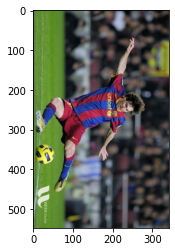

In [23]:
# Translation - Rotate
rows, cols, *_ = img_color.shape

M = cv2.getRotationMatrix2D((rows//2, rows//2), 270, 1)
dst = cv2.warpAffine(img_color, M, (rows, cols))

plt.imshow(dst[:, :, ::-1])

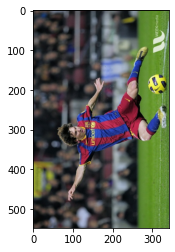

In [24]:
rows, cols, *_ = img_color.shape

M = cv2.getRotationMatrix2D((cols//2, cols//2), 90, 1)
dst = cv2.warpAffine(img_color, M, (rows, cols))

plt.imshow(dst[:, :, ::-1])

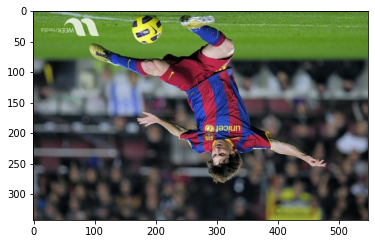

In [25]:
rows, cols, *_ = img_color.shape

M = cv2.getRotationMatrix2D((cols//2, rows//2), 180, 1)
dst = cv2.warpAffine(img_color, M, (cols, rows))

plt.imshow(dst[:, :, ::-1])

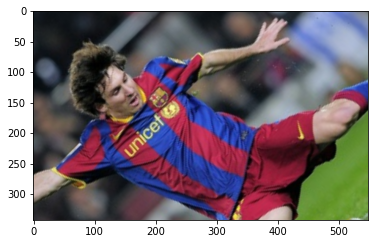

In [26]:
rows, cols, *_ = img_color.shape

M = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 2)
dst = cv2.warpAffine(img_color, M, (cols, rows))

plt.imshow(dst[:, :, ::-1])

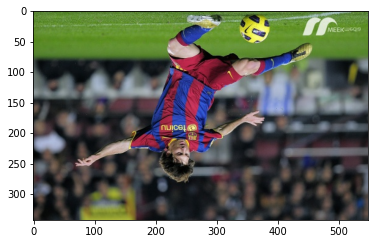

In [27]:
# Flip
dst = cv2.flip(img_color, flipCode=0)

plt.imshow(dst[:, :, ::-1])

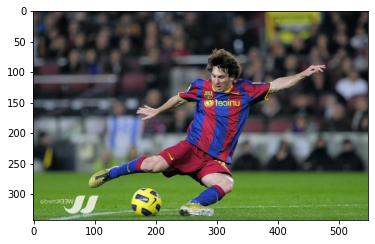

In [28]:
dst = cv2.flip(img_color, flipCode=1)

plt.imshow(dst[:, :, ::-1])

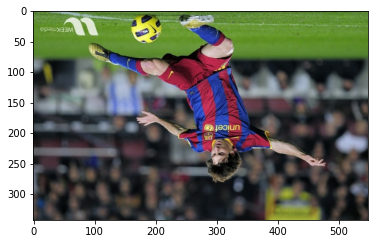

In [29]:
dst = cv2.flip(img_color, flipCode=-1)

plt.imshow(dst[:, :, ::-1])